In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

#from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))


# Any results you write to the current directory are saved as output.
print("Hello world!")
train_df = pd.read_csv(r'C:\Users\1004365\Desktop\Ajith TCS Internal\Kaggle\Digit Recogniser/train.csv')
test_df = pd.read_csv(r'C:\Users\1004365\Desktop\Ajith TCS Internal\Kaggle\Digit Recogniser/test.csv')

def data_checkup(data):
    print(data.shape)
    print(data.columns)
    print(data.describe)
    
data_checkup(train_df)
print("Done")

Hello world!
(42000, 785)
Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)
<bound method NDFrame.describe of        label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
5          0       0       0       0       0       0       0       0       0   
6          7       0       0       0       0       0       0       0       0   
7      

In [3]:
#print(train_df['label'])
#Output has 10 labels so divide the
train_copy = train_df.copy()
#lambda(x:x.label =0 ,)
#print(train_df.head())
train_copy = pd.get_dummies(train_copy, columns=['label'])

#train_copy = pd.get_dummies(train_copy[])
print("Done")
print(train_df.head())
print(train_copy.head())


Done
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0    

In [4]:
train_copy.apply(lambda x : sum(x.isnull()))

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
pixel6      0
pixel7      0
pixel8      0
pixel9      0
pixel10     0
pixel11     0
pixel12     0
pixel13     0
pixel14     0
pixel15     0
pixel16     0
pixel17     0
pixel18     0
pixel19     0
pixel20     0
pixel21     0
pixel22     0
pixel23     0
pixel24     0
pixel25     0
pixel26     0
pixel27     0
pixel28     0
pixel29     0
           ..
pixel764    0
pixel765    0
pixel766    0
pixel767    0
pixel768    0
pixel769    0
pixel770    0
pixel771    0
pixel772    0
pixel773    0
pixel774    0
pixel775    0
pixel776    0
pixel777    0
pixel778    0
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
label_0     0
label_1     0
label_2     0
label_3     0
label_4     0
label_5     0
label_6     0
label_7     0
label_8     0
label_9     0
Length: 794, dtype: int64

In [5]:
counts = pd.value_counts(train_df['label'])
print(counts)

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64


In [6]:
Y = train_df['label']
train_copy2 = train_df.copy()
del train_copy2['label']
X = train_copy2

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X,Y)
from __future__ import division
y_pred_train = clf.predict(X)
y_pred_test = clf.predict(test_df)
print(confusion_matrix(Y, y_pred_train))

[[4132    0    0    0    0    0    0    0    0    0]
 [   0 4683    0    0    0    0    0    1    0    0]
 [   0    0 4174    0    0    0    0    0    3    0]
 [   0    1    1 4347    0    1    0    0    1    0]
 [   1    1    0    0 4069    0    0    0    1    0]
 [   1    0    0    3    0 3791    0    0    0    0]
 [   0    1    0    0    0    0 4135    0    1    0]
 [   0    1    2    1    0    0    0 4396    0    1]
 [   0    1    1    2    1    1    0    0 4056    1]
 [   1    1    0    4    2    2    0    5    0 4173]]


In [9]:
y_pred_test = pd.DataFrame(y_pred_test)


In [11]:
y_pred_test.to_csv("sample_submission.csv")

# Tensor Flow

TensorFlow separates the definition of computation from the execution of the computation. In practice, this means that you need to:

1. Create a computational graph

2. Run a session to execute the operations in the graph

More efficient computation is a major benefit of this approach. The graph structure facilitates computation across multiple CPUs or GPUs by allowing you to direct the computation of different parts of the graph to specific CPUs / GPUs.


Ref: https://www.kaggle.com/ndalziel/beginner-s-guide-to-classification-tensorflow

In [1]:
import tensorflow as tf

#step1 Computational graph

op1 = tf.add(3,4)
op2 = tf.multiply(op1,5)

#step2 Run a session to execute the operations on the graph

with tf.Session() as sess:
    print(sess.run(op2))

35


In [5]:
#If we want to define the graph in more general terms and pass in variables, we need to create placeholders...

# Step0 create placeholders

X = tf.placeholder(tf.int32, name="X")
Y = tf.placeholder(tf.int32, name="Y")
Z = tf.placeholder(tf.int32, name="Z")

#step1 Create computational graph
op1 = tf.add(X,Y)
op2 = tf.multiply(op1,Z)

# Run a session to execute operations in the graph

var1 = 3; var2 = 4; var3 = 5

with tf.Session()  as sess:
    result = sess.run(op2, feed_dict= {X:var1, Y:var2, Z:var3})
    print(result)

35


In [6]:
#

# IMAGE RECOGNITION USING TENSORFLOW

In [7]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops

In [8]:
train_df = pd.read_csv(r'C:\Users\1004365\Desktop\Ajith TCS Internal\Kaggle\Digit Recogniser/train.csv')
test_df = pd.read_csv(r'C:\Users\1004365\Desktop\Ajith TCS Internal\Kaggle\Digit Recogniser/test.csv')

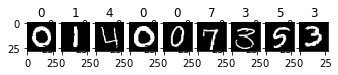

In [13]:
X_traindev = train_df.loc[:, "pixel0" : "pixel783"]
Y_traindev = train_df.loc[:,"label"]

%matplotlib inline
for n in range(1, 10):
    plt.subplot(1, 10 ,n)
    plt.imshow(X_traindev.iloc[n].values.reshape((28,28)), cmap='gray')
    plt.title(Y_traindev.iloc[n])

In [15]:
#create training data set 
X_train = X_traindev[:40000].T.values
Y_train = Y_traindev[:40000]

Y_train = pd.get_dummies(Y_train).T.values

#create cross validation set
X_dev = X_traindev[40000:42000].T.values
Y_dev = Y_traindev[40000:42000]
Y_dev = pd.get_dummies(Y_dev).T.values

#
X_test = test_df.T.values

print("Number of training examples: " + str(X_train.shape[1]))
print("Number of cross-validation examples = " + str(X_dev.shape[1]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_dev shape: " + str(X_dev.shape))
print ("Y_dev shape: " + str(Y_dev.shape))
print ("X_test shape: " + str(X_test.shape))

Number of training examples: 40000
Number of cross-validation examples = 2000
X_train shape: (784, 40000)
Y_train shape: (10, 40000)
X_dev shape: (784, 2000)
Y_dev shape: (10, 2000)
X_test shape: (784, 28000)


In [ ]:
#

Setting up the network

We need to start off by initializing variables, creating placeholders and implementing the computation graph. At thre core of the function below are the feed-foward equations:

Z(i) = W(i)*A(i-1) + b(i)
A(i) = activation_function * Z(i)

In [30]:
def create_graph(X_train,Y_train):
    #setup
    ops.reset_default_graph()                         # reset computation graph

    # initialize variables
    (n_x, training_examples) = X_train.shape                          
    n_y = Y_train.shape[0]                            
    costs = []

    # create placeholders
    X = tf.placeholder(tf.float32, shape=(n_x, None),name = "X")
    Y = tf.placeholder(tf.float32, shape=(n_y, None),name = "Y")
    
    # initialize weights
    W1 = tf.get_variable("W1", [32,784], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    W2 = tf.get_variable("W2", [16,32], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    W3 = tf.get_variable("W3", [10,16], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    
    # initialize biases
    b1 = tf.get_variable("b1", [32,1], initializer = tf.zeros_initializer())
    b2 = tf.get_variable("b2", [16,1], initializer = tf.zeros_initializer())
    b3 = tf.get_variable("b3", [10,1], initializer = tf.zeros_initializer())

    # create the graph for forward propagation
    Z1 = tf.add(tf.matmul(W1,X),b1)                                             
    A1 = tf.nn.relu(Z1)                                                         
    Z2 = tf.add(tf.matmul(W2,A1),b2)                                            
    A2 = tf.nn.relu(Z2)                                                         
    Z3 = tf.add(tf.matmul(W3,A2),b3)
    return X, Y, Z3, training_examples

#

Next, we'll specifiy how the model is optimized by choosing the optimization algorithm and the cost (or loss) function. The Adam optimization algorithm works well across a wide range of neural network architectures. (Adam essentially combined two other successful algorithms - gradient descent with momentum, and RMSProp.) For the loss function, 'softmax_cross_entropy_with_logits' is a good choice for multi-class classification.

In [31]:
def define_optimization(Z3, Y):
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels))
    optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)
    return optimizer, cost

Before we train the network, we need a function that creates randomized batches of training data so that we can implement mini-batch optimization (which will lead to faster optimization convergence)...

In [32]:
def random_mini_batches(X,Y, mini_batch_size = 64, seed = 0):
    #
    m = X.shape[1]
    mini_batches = []
    np.random.seed(seed)
    
    #step 1 Shuffile X,Y
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((Y.shape[0], m))
    
    #Step2: Partition (Shuffled_X, Shuffled_Y) minus the end case
    num_complete_minibatches = math.floor(m/mini_batch_size)
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k* mini_batch_size : k*mini_batch_size + mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k* mini_batch_size : k*mini_batch_size + mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
        
    #Handling the end case (last mini-batch < mini_batch_size)
    if m% mini_batch_size != 0:
        mini_batch_X = shuffled_X[:, num_complete_minibatches*mini_batch_size : m]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches*mini_batch_size : m]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    return mini_batches

Training the network:

Now, we'll open the TensorFlow session and execute the computation graph. Note that 1 epoch (or iteration) corresponds to a complete pass through the training set. For each epoch, we execute forward-prop and back-prop on all of the mini-batches. We'll print out the train and dev (or corss-validation) accuracy for each epoch, so can diagnose how well the neural network is performing...

In [33]:
def train_network(X_train, Y_train, X_dev, Y_dev, X_test, num_epochs, minibatch_size=64, print_n_epochs =1):
    #
    tf. set_random_seed(1)
    X,Y,Z_final, training_examples = create_graph(X_train, Y_train)
    optimizer, cost = define_optimization(Z_final, Y)
    init = tf.global_variables_initializer()   #set up variables for initialization
    
    with tf.Session() as sess:
        sess.run(init) # initializes variables we created
        for epoch in range(num_epochs):
            epoch_cost = 0
            num_minibatches = int(training_examples /minibatch_size)
            minibatches = random_mini_batches(X_train, Y_train)
            
            for minibatch in minibatches:
                (minibatch_X, minibatch_Y) = minibatch
                _, minibatch_cost = sess.run([optimizer, cost], 
                                            feed_dict ={X:minibatch_X, Y:minibatch_Y})
                
                epoch_cost += minibatch_cost / num_minibatches
                
            print("cost after epoch %i: %.3f"%(epoch+1, epoch_cost), end = "")
            correct_prediction = tf.equal(tf.argmax(Z_final), tf.argmax(Y))
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
            print("    Train Accuracy: %.3f"%(accuracy.eval({X:X_train, Y:Y_train})), end="")
            print("    Dev Accuracy: %.3f"%(accuracy.eval({X:X_dev, Y:Y_dev})))
            
        print("Network has been trained")
        predict = tf.argmax(Z_final).eval({X: X_test})
        probs = tf.nn.softmax(Z_final).eval({X:X_test})
        return predict, probs

In [34]:
Y_predict, Y_probs = train_network(X_train, Y_train, X_dev, Y_dev, X_test, num_epochs=20)

cost after epoch 1: 2.947    Train Accuracy: 0.626    Dev Accuracy: 0.628
cost after epoch 2: 0.901    Train Accuracy: 0.747    Dev Accuracy: 0.747
cost after epoch 3: 0.663    Train Accuracy: 0.846    Dev Accuracy: 0.844
cost after epoch 4: 0.527    Train Accuracy: 0.876    Dev Accuracy: 0.863
cost after epoch 5: 0.441    Train Accuracy: 0.875    Dev Accuracy: 0.867
cost after epoch 6: 0.372    Train Accuracy: 0.900    Dev Accuracy: 0.895
cost after epoch 7: 0.328    Train Accuracy: 0.907    Dev Accuracy: 0.898
cost after epoch 8: 0.295    Train Accuracy: 0.918    Dev Accuracy: 0.899
cost after epoch 9: 0.264    Train Accuracy: 0.923    Dev Accuracy: 0.913
cost after epoch 10: 0.243    Train Accuracy: 0.938    Dev Accuracy: 0.928
cost after epoch 11: 0.221    Train Accuracy: 0.930    Dev Accuracy: 0.919
cost after epoch 12: 0.207    Train Accuracy: 0.934    Dev Accuracy: 0.919
cost after epoch 13: 0.196    Train Accuracy: 0.935    Dev Accuracy: 0.921
cost after epoch 14: 0.190    Trai

In [35]:
Y_predict = Y_predict.reshape(-1,1)
predictions_df = pd.DataFrame(Y_predict, columns=['Label'])
predictions_df['ImageID'] = predictions_df.index + 1
submission_df = predictions_df[predictions_df.columns[::-1]]
submission_df.to_csv("submission.csv", index=False, header=True)